In [24]:
import json
import pandas as pd
import numpy as np

# Load and clean data
with open("firestore-backup.json", "r") as file:
    data = json.load(file)

# load the tables
raw_pddls = data['pddls']
pddls = pd.DataFrame(raw_pddls)
raw_performance =data["performance"]
performance = pd.DataFrame(raw_performance)
raw_prompts = data["prompts"]
prompts = pd.DataFrame(raw_prompts)
raw_sessions = data["sessions"]
sessions = pd.DataFrame(raw_sessions)
raw_users=data["users"]
users = pd.DataFrame(raw_users)

print(performance.info())








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        238 non-null    object
 1   promptId                  238 non-null    object
 2   zeroShotTime              238 non-null    int64 
 3   promptEngineeringTime     238 non-null    int64 
 4   pddlPlannerTime           238 non-null    int64 
 5   zeroShotFailure           238 non-null    bool  
 6   promptEngineeringFailure  238 non-null    bool  
 7   pddlPlannerFailure        238 non-null    bool  
 8   zeroShotError             19 non-null     object
 9   promptEngineeringError    19 non-null     object
 10  pddlPlannerError          1 non-null      object
 11  timestamp                 238 non-null    object
 12  user_id                   118 non-null    object
dtypes: bool(3), int64(3), object(7)
memory usage: 19.4+ KB
None
0      {'_seconds': 

In [37]:
feedback = pd.read_excel("feedback.xlsx")
feedback.info()



np.float64(3.902439024390244)

In [55]:
#Best performing workflow
best_workflow = feedback['best_study'].mode()
print(best_workflow)

0     Myrmidon
Name: best_study, dtype: object


In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics (x-axis labels)
metrics = ['Realistic', 'Satisfied', 'Follow', 'Understand', 'Better', 'Align']

# Mean values for each workflow
troy_means = [
    feedback['troy_realistic'].mean(),
    feedback['troy_satisfied'].mean(),
    feedback['troy_follow'].mean(),
    feedback['troy_understand'].mean(),
    feedback['troy_better'].mean(),
    feedback['troy_align'].mean()
]

ithaca_means = [
    feedback['ithaca_realistic'].mean(),
    feedback['ithaca_satisfied'].mean(),
    feedback['ithaca_follow'].mean(),
    feedback['ithaca_understand'].mean(),
    feedback['ithaca_better'].mean(),
    feedback['ithaca_align'].mean()
]

myrmidon_means = [
    feedback['myrmidon_realistic'].mean(),
    feedback['myrmidon_satisfied'].mean(),
    feedback['myrmidon_follow'].mean(),
    feedback['myrmidon_understand'].mean(),
    feedback['myrmidon_better'].mean(),
    feedback['myrmidon_align'].mean()
]

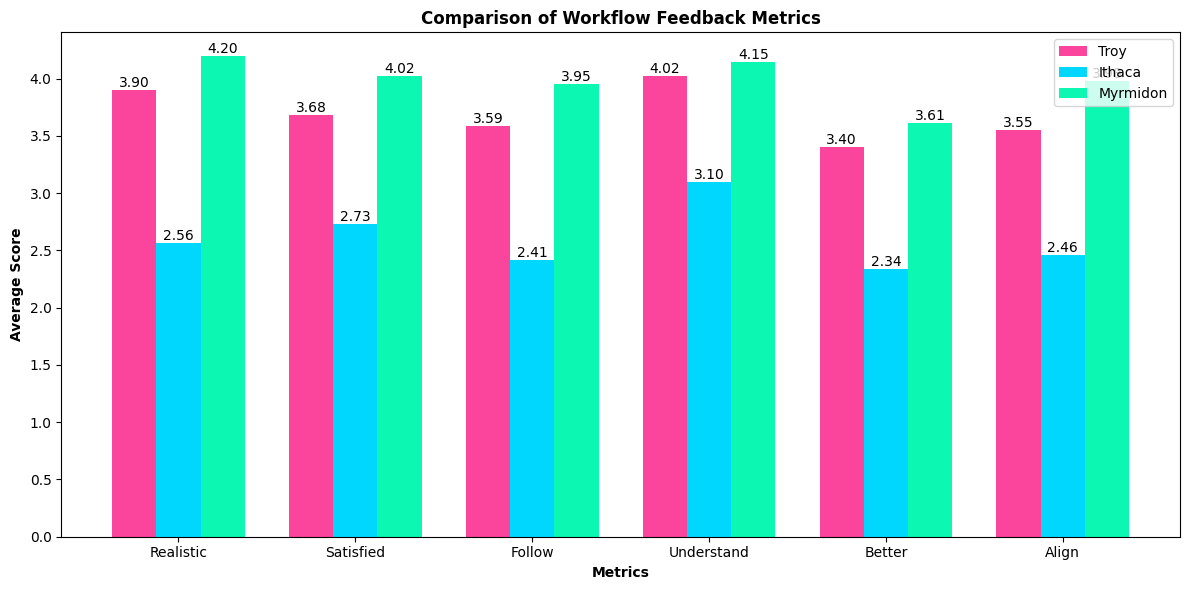

In [58]:
# Set width of bars
bar_width = 0.25
x = np.arange(len(metrics))  # x-axis positions

# Create bars
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, troy_means, width=bar_width, label='Troy', color='#fb449c')
plt.bar(x, ithaca_means, width=bar_width, label='Ithaca', color='#00d7ff')
plt.bar(x + bar_width, myrmidon_means, width=bar_width, label='Myrmidon', color='#0cf7b2')

# Customize the plot
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Average Score', fontweight='bold')
plt.title('Comparison of Workflow Feedback Metrics', fontweight='bold')
plt.xticks(x, metrics)
plt.legend()

# Add value labels on top of bars
for i in range(len(metrics)):
    plt.text(x[i] - bar_width, troy_means[i], f'{troy_means[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i], ithaca_means[i], f'{ithaca_means[i]:.2f}', ha='center', va='bottom')
    plt.text(x[i] + bar_width, myrmidon_means[i], f'{myrmidon_means[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()